<a href="https://colab.research.google.com/github/Anagefilho/UFU_Mestrado/blob/main/NQueens_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitness, anotando quanto as rainhas se colidem horizontalmente e verticalmente em cada indivíduo.

In [4]:
def fitnessScore(pop,new_pop):
    if pop.size > n: #Caso normal
      fit = np.zeros([pop[:,1].size, 1],dtype=int) #Criação da array do fit do tamanho da população, a matriz contém 1 coluna com pop.size linhas.
      colide_diagonal = 0
      colide_linha = 0

      for i in range(new_pop): #for para passar em toda população atual.
          colide_linha = len(pop[i]) - len(np.unique(pop[i])) # se existir números iguais na linha as rainhas estão se colidindo horizontalmente.

          x = pop[i]
          colide_diagonal = 0

          for k in range(len(x)): # k é criado para comparar a posição da peça atual com todas peças do tabuleiro.

            for j in range(len(x)): # j criado para ser comparado com k
                if j != k:
                  delta_x = abs(k - j) # diferença das colunas da peça atual k com as outras peças j
                  delta_y = abs(x[k] - x[j]) # diferença entre peça atual x[k] com as outras do tabuleiro x[j], diferença das linhas de cada rainha

                  if(delta_x == delta_y): # quando as diferenças entre as colunas (delta_x) e a diferença entre as linhas são iguais temos uma colisão diagonal. 
                    colide_diagonal += 1

            fit[i,0] = colide_linha + colide_diagonal

    if pop.size == n:  # Caso do indivíduo aleatório    
      fit = np.zeros(1)
      colide_linha = len(pop) - len(np.unique(pop)) # se existir números iguais na linha as rainhas estão se colidindo horizontalmente.
      x = pop
      colide_diagonal = 0
      for k in range(len(x)): # k é criado para comparar a posição da peça atual com todas peças do tabuleiro.

            for j in range(len(x)): # j criado para ser comparado com k
                if j != k:
                  delta_x = abs(k - j) # diferença das colunas da peça atual k com as outras peças j
                  delta_y = abs(x[k] - x[j]) # diferença entre peça atual x[k] com as outras do tabuleiro x[j], diferença das linhas de cada rainha

                  if(delta_x == delta_y): # quando as diferenças entre as colunas (delta_x) e a diferença entre as linhas são iguais temos uma colisão diagonal. 
                    colide_diagonal += 1
      return colide_diagonal+colide_linha

    return fit

#Crossover simples e de dois pontos

In [5]:
#Cruzamento 
def crossoverX(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = random.randint(0, n)

    p11 = pai1[0:x]
    p12 = pai1[x:n]
    p21 = pai2[0:x]
    p22 = pai2[x:n]
    
    filho1 = np.hstack([p11,p22])
    filho2 = np.hstack([p21,p12])
    
    filho1 = Mutacao(filho1) #Aplicando a mutação
    filho2 = Mutacao(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos

def crossover2X(pai1, pai2):
    filho1 = np.zeros([len(pai1)],dtype=int) #Inicia filhos
    filho2 = np.zeros([len(pai2)], dtype=int)
    x = int(n/4)
    y = int(n/2)
    
    p11 = pai1[0:x]
    p1m = pai1[x:y]
    p1m2 = pai1[y:x+y]
    p12 = pai1[x+y:n]

    p21 = pai2[0:x]
    p2m = pai2[x:y]
    p2m2 = pai2[y:x+y]
    p22 = pai2[x+y:n]

    filho1 = np.concatenate([p11,p2m,p2m2,p12])
    filho2 = np.concatenate([p21,p1m,p1m2,p22])
    
    filho1 = MutacaoDupla(filho1) #Aplicando a mutação dupla 
    filho2 = MutacaoDupla(filho2)
    
    filhos = np.vstack([filho1,filho2])
    return filhos


# Mutações, e dupla mutação

In [6]:
#Mutações
def Mutacao(child, Mutacao_prob=.20): #probabilidade de mutação de 80% para dar mais diversividade ao modelo mas sem mutação dupla
      p = random.random()
      if(p > Mutacao_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        return child       

      else:
        return child

def MutacaoDupla(child, Mutacao_prob=.20): #probabilidade de mutação de 80% para dar mais diversividade ao modelo, e tem a chance de ocorrer mutação dupla.
      p = random.random()
      if(p > Mutacao_prob):
        ind = np.random.choice(len(child), 4, replace=False)
        temp = child[ind[0]]
        child[ind[0]] = child[ind[1]]
        child[ind[1]] = temp
        
        if (p > 0.7): #Mutação dupla, 0.2% de chance
          temp2 = child[ind[2]]
          child[ind[2]] = child[ind[3]]
          child[ind[3]] = temp2
          
      return child       



#Seleção dos melhores pais da população e função de imprimir tabuleiro

In [35]:
#Avaliação, checa fitness
def selecao_ranking(pop, new_pop):
    pop = pop[pop[:,n].argsort()][0:new_pop, :] #retorna uma lista com a população ordenada pelo fitting score
    return pop[0],pop[1] #pegamos os 2 melhores pais da população atual.

def selecao_aleatoria(pop, new_pop):
    pai_aleatorio = random.randint(0, new_pop/2)
    pai_aleatorio2 = random.randint(0, new_pop/2)
    return pop[pai_aleatorio],pop[pai_aleatorio2] # 2 pais aleatórios da metade da população. 

def lista_probabilidade(pop):
    fitness = pop[n]
    total_fit = float(sum(fitness))
    relative_fitness = [f/total_fit for f in fitness]
    probabilities = [sum(relative_fitness[:i+1]) 
                     for i in range(len(relative_fitness))]
    return probabilities

def selecao_roleta(pop, probabilities, new_pop):
    chosen = []
    for n in range(new_pop):
        r = random.random()
        for (i, individual) in enumerate(pop):
            if r <= probabilities[i]:
                chosen.append(list(individual))
                break
    return chosen

def tabuleiro(pop, n): # Desenha o tabuleiro
    tabuleiro = np.zeros((n,n,3))
    tabuleiro += 0.5 # Inicializa o tabuleiro com cor preta em todas as casas da matriz
    tabuleiro[::2, ::2] = 1 # Cor branca
    tabuleiro[1::2, 1::2] = 1 # Cor branca restantes

    positions = pop[0,:n] # A melhor população

    fig, ax = plt.subplots()
    ax.imshow(tabuleiro, interpolation='nearest')

    for y, x in enumerate(positions):
        ax.text(x, y, u'\u2655', size=15, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    
    plt.show()

#Inicialização e looping (Exemplo com gerações)

# Alterações possíveis no código
1.   Escolher tipo de seleção: selecao_aleatoria, selecao_ranking
2.   Crossover: crossoverX / crossover2X
3.   Mutação: Mutacao / MutacaoDupla



# Início do G.A

[0.0625, 0.28125, 0.3125, 0.5, 0.65625, 0.65625, 0.78125, 0.875, 1.0]
[[2, 7, 1, 6, 5, 0, 4, 3, 4], [3, 2, 7, 5, 0, 1, 6, 4, 4], [2, 5, 1, 4, 0, 3, 6, 7, 2], [2, 7, 1, 3, 5, 0, 4, 6, 2], [6, 1, 2, 0, 5, 7, 4, 3, 4], [1, 2, 7, 5, 3, 0, 6, 4, 2], [1, 2, 7, 5, 3, 0, 6, 4, 2], [1, 2, 7, 5, 3, 0, 6, 4, 2], [1, 2, 7, 5, 3, 0, 6, 4, 2], [2, 7, 1, 3, 5, 0, 4, 6, 2], [4, 7, 2, 0, 5, 3, 1, 6, 4], [2, 5, 1, 4, 0, 3, 6, 7, 2], [3, 2, 7, 5, 0, 1, 6, 4, 4], [3, 2, 7, 5, 0, 1, 6, 4, 4], [1, 2, 7, 5, 3, 0, 6, 4, 2], [4, 7, 2, 0, 5, 3, 1, 6, 4], [3, 2, 7, 5, 0, 1, 6, 4, 4], [2, 5, 1, 4, 0, 3, 6, 7, 2], [2, 5, 1, 4, 0, 3, 6, 7, 2], [2, 5, 1, 4, 0, 3, 6, 7, 2], [2, 7, 1, 6, 5, 0, 4, 3, 4], [4, 7, 2, 0, 5, 3, 1, 6, 4], [1, 2, 7, 5, 3, 0, 6, 4, 2], [2, 7, 1, 3, 5, 0, 4, 6, 2], [2, 7, 1, 6, 5, 0, 4, 3, 4], [2, 7, 1, 3, 5, 0, 4, 6, 2], [3, 2, 7, 5, 0, 1, 6, 4, 4], [3, 2, 7, 5, 0, 1, 6, 4, 4], [4, 7, 2, 0, 5, 3, 1, 6, 4], [4, 7, 2, 0, 5, 3, 1, 6, 4], [2, 5, 1, 4, 0, 3, 6, 7, 2], [2, 5, 1, 4, 0, 3, 6, 7, 2], [

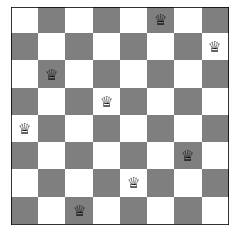

In [40]:
import sys
import random
import numpy as np 
import matplotlib.pyplot as plt

#Roteiro para criação do algoritmo genético

#Representação
#Inicialização
#Avaliação
#Loop
#Seleção
#Cruzamento
#Mutação
#Avaliação
#Reinserção

#Representação por exemplo: 8 rainhas, [1 4 3 6 2 7 5 0]

# Nesse caso a fitness = número de rainhas se conflitando.  
""" 
    k = 0, j = 2
    0 - 2 = 2 
    x[k] - x[j]
    1 - 3 = 2
    colide diagonal += 1

    k = 1, j = 2
    1 - 2 = 1
    x[k] - x[j]
    4 - 3 = 1
    colide diagonal += 1

    k = 1, j = 3 
    1 - 3 = 2
    x[k] = 4, x[j] = 6
    4 - 6 = 2
    colide diagonal += 1

    fitness score = 3 nesse indivíduo.

   0 1 2 3 4 5 6 7 
0 [0 0 0 0 0 0 0 X ] 
1 [X 0 0 0 0 0 0 0 ]
2 [0 0 0 0 X 0 0 0 ]
3 [0 0 X 0 0 0 0 0 ]
4 [0 X 0 0 0 0 0 0 ]
5 [0 0 0 0 0 0 X 0 ]
6 [0 0 0 X 0 0 0 0 ]
7 [0 0 0 0 0 X 0 0 ]
"""
#Inicialização
#n = int(input("Digite o número de rainhas: "))
#new_pop = int(input("Número da população: "))
n = 8
new_pop = 200
generation = 0

pop = np.zeros([new_pop,n],dtype=int)
IndAleatorio = np.zeros(n)

for i in range(new_pop):
    pop[i, :] = np.random.permutation(n) #Inicialização da população com permutações dos númeoros de 0 até n.

  
fit = fitnessScore(pop,new_pop) # calcula de todos da população atual

pop = np.hstack([pop,fit]) # adiciona na ultima linha os valores de fitness de cada indivíduo da população.

pop = pop[pop[:,n].argsort()][0:new_pop, :] # Retorna a população ordenada pelo fitting 

#Loop
while(pop[0][n] != 0):
    generation+=1
    print("Geração: ", generation, "\nMelhor indivíduo: ", pop[0], "Nº de conflitos: ", pop[0,n])
    
    if(generation > 500): # Tentativa de recomeço aleatório, adiciona um indivíduo aleatório no final para fugir de ótimo local.
       IndAleatorio = np.random.permutation(n)
       fit = fitnessScore(IndAleatorio, 1)
       IndAleatorio = np.hstack([IndAleatorio,fit])
       pop[-1] = IndAleatorio # Reinserção 


    pai1, pai2 = selecao_ranking(pop, new_pop) #Seleção dos pais, selecao_ranking ou selecao_aleatoria pode ser utilizado
   # print(pai1, pai2)
    filhos = crossoverX(pai1, pai2) # Crossover, crossoverX ou crossover2x pode ser utilizado, mudar função de mutação dentro dele.
    fit_filhos = fitnessScore(filhos,2)

    filhos = np.hstack([filhos,fit_filhos])
    #print("Ind. aleatório: ", pop[-1])
    pop = np.vstack([pop,filhos]) # Reinserção

    pop = pop[pop[:,n].argsort()][0:new_pop, :] # Atualiza pop pegando os melhores individuos

    if generation > 9999:
      break

print("Número de rainhas: ", n)
print("Número de gerações: ", generation)
print("Melhor solução: ", pop[0, 0:n])
print("Número de conflitos: ", pop[0][n])
tabuleiro(pop, n) #figura

#Seleção

#Avaliação

#Reinserção



In [ ]:
import sys
import random
import numpy as np 
import matplotlib.pyplot as plt

#Roteiro para criação do algoritmo genético

#Representação
#Inicialização
#Avaliação
#Loop
#Seleção
#Cruzamento
#Mutação
#Avaliação
#Reinserção

#Representação por exemplo: 8 rainhas, [1 4 3 6 2 7 5 0]

# Nesse caso a fitness = número de rainhas se conflitando.  
""" 
    k = 0, j = 2
    0 - 2 = 2 
    x[k] - x[j]
    1 - 3 = 2
    colide diagonal += 1

    k = 1, j = 2
    1 - 2 = 1
    x[k] - x[j]
    4 - 3 = 1
    colide diagonal += 1

    k = 1, j = 3 
    1 - 3 = 2
    x[k] = 4, x[j] = 6
    4 - 6 = 2
    colide diagonal += 1

    fitness score = 3 nesse indivíduo.

   0 1 2 3 4 5 6 7 
0 [0 0 0 0 0 0 0 X ] 
1 [X 0 0 0 0 0 0 0 ]
2 [0 0 0 0 X 0 0 0 ]
3 [0 0 X 0 0 0 0 0 ]
4 [0 X 0 0 0 0 0 0 ]
5 [0 0 0 0 0 0 X 0 ]
6 [0 0 0 X 0 0 0 0 ]
7 [0 0 0 0 0 X 0 0 ]
"""
#Inicialização
#n = int(input("Digite o número de rainhas: "))
#new_pop = int(input("Número da população: "))
n = 24
new_pop = 200
generation = 0

pop = np.zeros([new_pop,n],dtype=int)
IndAleatorio = np.zeros(n)

for i in range(new_pop):
    pop[i, :] = np.random.permutation(n) #Inicialização da população com permutações dos númeoros de 0 até n.

  
fit = fitnessScore(pop,new_pop) # calcula de todos da população atual

pop = np.hstack([pop,fit]) # adiciona na ultima linha os valores de fitness de cada indivíduo da população.

pop = pop[pop[:,n].argsort()][0:new_pop, :] # Retorna a população ordenada pelo fitting 

#Loop
while(pop[0][n] != 0):
    generation+=1
    print("Geração: ", generation, "\nMelhor indivíduo: ", pop[0], "Nº de conflitos: ", pop[0,n])
    
    if(generation > 500): # Tentativa de recomeço aleatório, adiciona um indivíduo aleatório no final para fugir de ótimo local.
       IndAleatorio = np.random.permutation(n)
       fit = fitnessScore(IndAleatorio, 1)
       IndAleatorio = np.hstack([IndAleatorio,fit])
       pop[-1] = IndAleatorio # Reinserção 


    probability = lista_probabilidade(pop)
    pais = selecao_roleta(pop, probability, new_pop)
    
    for i in range(int(len(pais)/2)): #Crossover com metade dos pais da população
      filhos = crossoverX(pais[i],pais[i+1])
      fit_filhos = fitnessScore(filhos,2)   
      filhos = np.hstack([filhos,fit_filhos])

    pop = np.vstack([pop,filhos]) # Reinserção
    pop = pop[pop[:,n].argsort()][0:new_pop, :] # Atualiza pop pegando os "tamanho da população" melhores individuos, reinserção 

    if generation > 9999:
      break

print("Número de rainhas: ", n)
print("Número de gerações: ", generation)
print("Melhor solução: ", pop[0, 0:n])
print("Número de conflitos: ", pop[0][n])
tabuleiro(pop, n) #figura

#Seleção

#Avaliação

#Reinserção



A saída de streaming foi truncada nas últimas 5000 linhas.
Melhor indivíduo:  [19. 15.  2.  5. 13.  6. 17. 14. 20.  0. 14. 21.  1.  9. 17. 12. 10. 23.
 17. 11. 18.  4.  7. 16.  3.] Nº de conflitos:  3.0
Geração:  1874 
Melhor indivíduo:  [19. 15.  2.  5. 13.  6. 17. 14. 20.  0. 14. 21.  1.  9. 17. 12. 10. 23.
 17. 11. 18.  4.  7. 16.  3.] Nº de conflitos:  3.0
Geração:  1875 
Melhor indivíduo:  [19. 15.  2.  5. 13.  6. 17. 14. 20.  0. 14. 21.  1.  9. 17. 12. 10. 23.
 17. 11. 18.  4.  7. 16.  3.] Nº de conflitos:  3.0
Geração:  1876 
Melhor indivíduo:  [19. 15.  2.  5. 13.  6. 17. 14. 20.  0. 14. 21.  1.  9. 17. 12. 10. 23.
 17. 11. 18.  4.  7. 16.  3.] Nº de conflitos:  3.0
Geração:  1877 
Melhor indivíduo:  [19. 15.  2.  5. 13.  6. 17. 14. 20.  0. 14. 21.  1.  9. 17. 12. 10. 23.
 17. 11. 18.  4.  7. 16.  3.] Nº de conflitos:  3.0
Geração:  1878 
Melhor indivíduo:  [19. 15.  2.  5. 13.  6. 17. 14. 20.  0. 14. 21.  1.  9. 17. 12. 10. 23.
 17. 11. 18.  4.  7. 16.  3.] Nº de conflitos:  3

In [29]:
len(pais)

200